# MOVIE RECOMMENDATION SYSTEM


In [141]:
# Data Manipulation
import pandas as pd
import numpy as np
from math import sqrt

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df_r = pd.read_csv("C:/Users/Aditya Saxena/Downloads/Dataset.csv (1)/Dataset.csv")

In [143]:
df_m = pd.read_csv("C:/Users/Aditya Saxena/Downloads/Movie_Id_Titles (1).csv")

In [144]:
df_r

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [145]:
df_m

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [146]:
df = pd.merge(df_r,df_m, on = 'item_id')

In [147]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


#### EDA

In [148]:
# Number of unique users and movies
print(f"Number of unique users: {df_r['user_id'].nunique()}")
print(f"Number of unique movies: {df_m['item_id'].nunique()}")

Number of unique users: 944
Number of unique movies: 1682


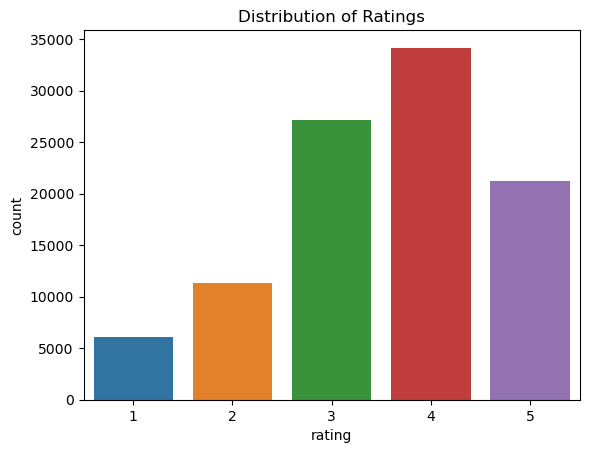

In [149]:
# Distribution of ratings
sns.countplot(x='rating', data=df_r)
plt.title('Distribution of Ratings')
plt.show()

In [150]:
# Most rated movies
most_rated = df_r.groupby('item_id').size().sort_values(ascending=False).head(10)
most_rated_movies = df_m[df_m['item_id'].isin(most_rated.index)]
print(most_rated_movies)

     item_id                          title
0          1               Toy Story (1995)
49        50               Star Wars (1977)
99       100                   Fargo (1996)
120      121  Independence Day (ID4) (1996)
180      181      Return of the Jedi (1983)
257      258                 Contact (1997)
285      286    English Patient, The (1996)
287      288                  Scream (1996)
293      294               Liar Liar (1997)
299      300           Air Force One (1997)


#### Collaborative Based Recommendation System

In [151]:
# Create user-item interaction matrix
user_item_matrix = df_r.pivot(index='user_id', columns='item_id', values='rating')
user_item_matrix.fillna(0, inplace=True)


In [152]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [153]:
# Predict ratings using user-based collaborative filtering
def predict_user_based(user_item_matrix, user_similarity):
    user_means = user_item_matrix.mean(axis=1).values.reshape(-1, 1)
    ratings_diff = user_item_matrix - user_means
    pred = user_means + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).reshape(-1, 1)
    return pred

user_based_predictions = predict_user_based(user_item_matrix, user_similarity)
user_based_predictions_df = pd.DataFrame(user_based_predictions, index=user_item_matrix.index, columns=user_item_matrix.columns)


In [154]:
# Compute cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [155]:
# Predict ratings using item-based collaborative filtering
def predict_item_based(user_item_matrix, item_similarity):
    pred = user_item_matrix.dot(item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])
    return pred

item_based_predictions = predict_item_based(user_item_matrix.values, item_similarity)
item_based_predictions_df = pd.DataFrame(item_based_predictions, index=user_item_matrix.index, columns=user_item_matrix.columns)

In [156]:
# Generate top-N recommendations
def get_top_n_recommendations(user_id, n=10, user_based=True):
    if user_based:
        predictions_df = user_based_predictions_df
    else:
        predictions_df = item_based_predictions_df

    user_ratings = predictions_df.loc[user_id]
    already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    user_ratings = user_ratings.drop(already_rated)
    top_n_movies = user_ratings.sort_values(ascending=False).head(n).index
    top_n_movie_titles = df_m[df_m['item_id'].isin(top_n_movies)]
    
    return top_n_movie_titles


In [157]:
# Get top 10 movie recommendations for user 1 using user-based collaborative filtering
top_10_movies_user_based = get_top_n_recommendations(user_id=1, n=10, user_based=True)
print(top_10_movies_user_based)


     item_id                                   title
285      286             English Patient, The (1996)
287      288                           Scream (1996)
293      294                        Liar Liar (1997)
317      318                 Schindler's List (1993)
356      357  One Flew Over the Cuckoo's Nest (1975)
404      405              Mission: Impossible (1996)
422      423       E.T. the Extra-Terrestrial (1982)
482      483                       Casablanca (1942)
495      496            It's a Wonderful Life (1946)
654      655                      Stand by Me (1986)


In [158]:
# Get top 10 movie recommendations for user 5 using item-based collaborative filtering
top_10_movies_item_based = get_top_n_recommendations(user_id=5, n=10, user_based=False)
print(top_10_movies_item_based)

      item_id                                       title
742       743            Crow: City of Angels, The (1996)
1239     1240  Ghost in the Shell (Kokaku kidotai) (1995)
1471     1472       Visitors, The (Visiteurs, Les) (1993)
1475     1476                             Raw Deal (1948)
1541     1542                  Scarlet Letter, The (1926)
1617     1618                     King of New York (1990)
1625     1626  Nobody Loves Me (Keiner liebt mich) (1994)
1626     1627                            Wife, The (1995)
1656     1657                               Target (1995)
1660     1661                         New Age, The (1994)
